___

<a href='http://www.pieriandata.com'> <img src='../../Pierian_Data_Logo.png' /></a>
___

# SF Salaries Exercise 

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

** Import pandas as pd.**

In [1]:
import pandas as pd

** Read Salaries.csv as a dataframe called sal.**

In [2]:
sal = pd.read_csv('data/Salaries.csv')

** Check the head of the DataFrame. **

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


** Use the .info() method to find out how many entries there are.**

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

In [5]:
sal['BasePay'].mean()

66325.44884050643

** What is the highest amount of OvertimePay in the dataset ? **

In [6]:
sal['OvertimePay'].max()

245131.88

** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [7]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

** How much does JOSEPH DRISCOLL make (including benefits)? **

In [8]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

** What is the name of highest paid person (including benefits)?**

In [11]:
sal[sal["TotalPayBenefits"]==sal["TotalPayBenefits"].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [11]:
sal[sal["TotalPayBenefits"]==sal["TotalPayBenefits"].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [16]:
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

** How many unique job titles are there? **

In [17]:
sal['JobTitle'].nunique()

2159

** What are the top 5 most common jobs? **

In [22]:
sal['JobTitle'].value_counts().sort_values(ascending=False).head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [23]:
(sal[sal['Year']==2013]['JobTitle'].value_counts()==1).sum()


202

** How many people have the word Chief in their job title? (This is pretty tricky) **

In [50]:
def check(x):
    '''To convert the jobtitles into lower case,split it and check if it has 'chief' in it '''
    x=x.lower().split()
    if 'chief' in x:
        return True
    else:
        return False
  

In [49]:
a=list()
for i in sal['JobTitle']:
    a.append(check(i))
sum(a)

477

** Bonus: Is there a correlation between length of the Job Title string and Salary? **

In [52]:
sal['len'] = sal['JobTitle'].apply(len)

In [57]:
sal[['len','TotalPayBenefits']].corr()

,len,TotalPayBenefits
len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


**Plotting**

Text(0,0.5,'TotalPayBenefits')

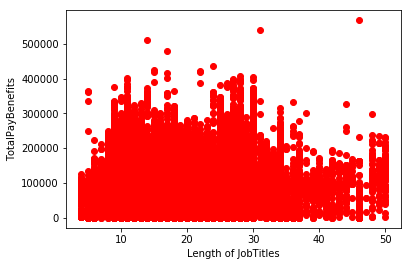

In [69]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(sal['len'],sal['TotalPayBenefits'],color='R')
plt.xlabel('Length of JobTitles')
plt.ylabel('TotalPayBenefits')

# Great Job!